In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

from itertools import product
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
#from pyramid.arima import auto_arima

In [2]:
df = pd.DataFrame({})
path = '/media/mayur/Softwares/BE Project/ProcessedDataset/November/'
for i in range(1,8):
    df_new = pd.read_csv(path+'sms-call-internet-mi-2013-11-0{}.csv'.format(i), parse_dates=['activity_date'])
    df = df.append(df_new)
    print("File " + str(i) + " added")

File 1 added
File 2 added
File 3 added
File 4 added
File 5 added
File 6 added
File 7 added


In [3]:
df['activity_hour'] += 24*(df.activity_date.dt.day-1)
df.head()

,square_id,activity_date,activity_hour,total_activity
0,NaN,NaT,NaN,NaN
1,1.0,2013-11-01,0.0,2.318359
2,1.0,2013-11-01,1.0,0.879858
3,1.0,2013-11-01,2.0,2.075716
4,1.0,2013-11-01,3.0,0.897144


# Plot the series

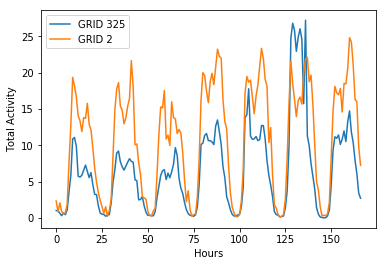

In [4]:
ax = df[df.square_id==325].plot(x='activity_hour', y='total_activity', label='GRID 325')
df[df.square_id==2].plot(ax=ax, x='activity_hour', y='total_activity', label='GRID 2')
plt.xlabel("Hours")
plt.ylabel("Total Activity")
plt.show()

## Series transformation

Text(0.5, 1.0, 'Grid 147 - Week 1 data')

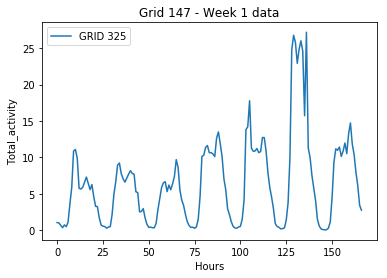

In [5]:
df_grid = df[df['square_id']==325]
#df_grid.set_index('activity_hour', inplace=True) 
df_grid.drop(['square_id', 'activity_date'], axis=1, inplace=True)
#df_grid.to_csv('ts-grid-147.csv', index=False, encoding='utf-8')

#Plot the data
ax = df_grid.plot(x='activity_hour', y='total_activity', label='GRID 325')
plt.xlabel('Hours')
plt.ylabel('Total_activity')
plt.title('Grid 147 - Week 1 data')

# Split dataset into train and test

In [6]:
train = df_grid[:125]
print('Train')
train.head()

Train


,activity_hour,total_activity
7777,0.0,1.025847
7778,1.0,0.975326
7779,2.0,0.637472
7780,3.0,0.323641
7781,4.0,0.705796


In [7]:
test = df_grid[125:]
print('Test')
test.head()

Test


,activity_hour,total_activity
7782,125.0,1.392167
7783,126.0,3.766164
7784,127.0,9.955345
7785,128.0,24.753953
7786,129.0,26.782203


# Plot Train-Test data

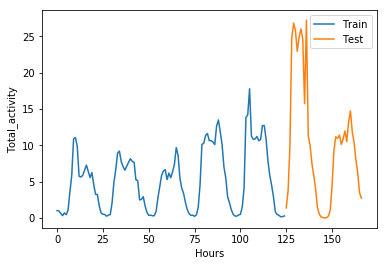

In [8]:
ax = train.plot(x='activity_hour', y='total_activity', label='Train')
test.plot(ax=ax, x='activity_hour', y='total_activity', label='Test')
plt.xlabel('Hours')
plt.ylabel('Total_activity')
plt.show()

# Decompose the series

In [9]:
train = train.set_index('activity_hour')    #Run this line once
test = test.set_index('activity_hour')
train.head()
#decomposition = seasonal_decompose(df_grid, model='multiplicative')	#try 'additive'
#decomposition = sm.tsa.seasonal_decompose(df_grid, model='additive')
#fig = decomposition.plot()
#plt.show()

,total_activity
activity_hour,
0.0,1.025847
1.0,0.975326
2.0,0.637472
3.0,0.323641
4.0,0.705796


# Fit Arima model

In [10]:
'''
ARIMA model

parameters_list - list with (p, q, P, Q)
    p - associated with the auto-regressive aspect of the model
    d - integration order in ARIMA model (effects the amount of differencing to apply to a time series)
    D - seasonal integration order 
    
'''

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in pdq]

In [11]:
# AIC Scores
# Akaike information criterion (AIC) (Akaike, 1974) 
# is a fined technique based on in-sample fit 
# to estimate the likelihood of a model to predict/estimate the future values. 
# A good model is the one that has minimum AIC among all the other models.

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}24 - AIC:{}'.format(param, param_seasonal, results.aic))
        
        except:
            continue

/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 24)24 - AIC:828.6994443866163
ARIMA(0, 0, 0)x(0, 0, 1, 24)24 - AIC:608.2961476235492
ARIMA(0, 0, 0)x(0, 1, 0, 24)24 - AIC:446.0819167378819
ARIMA(0, 0, 0)x(0, 1, 1, 24)24 - AIC:356.99919000826367
ARIMA(0, 0, 0)x(1, 0, 0, 24)24 - AIC:442.92014771371583


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 24)24 - AIC:429.61034194363464
ARIMA(0, 0, 0)x(1, 1, 0, 24)24 - AIC:360.80151585190407


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 24)24 - AIC:358.97905386743133
ARIMA(0, 0, 1)x(0, 0, 0, 24)24 - AIC:695.7930600205251


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 24)24 - AIC:515.4773152397621
ARIMA(0, 0, 1)x(0, 1, 0, 24)24 - AIC:390.6601457899814


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 24)24 - AIC:309.5453964075734
ARIMA(0, 0, 1)x(1, 0, 0, 24)24 - AIC:394.2828438820737


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 24)24 - AIC:379.5184477334172


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 24)24 - AIC:316.23635573865243


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 24)24 - AIC:307.1481302613392
ARIMA(0, 1, 0)x(0, 0, 0, 24)24 - AIC:497.08767917463797
ARIMA(0, 1, 0)x(0, 0, 1, 24)24 - AIC:380.8384406313996
ARIMA(0, 1, 0)x(0, 1, 0, 24)24 - AIC:353.80741914529085


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 24)24 - AIC:271.104369596839
ARIMA(0, 1, 0)x(1, 0, 0, 24)24 - AIC:354.3495647761501
ARIMA(0, 1, 0)x(1, 0, 1, 24)24 - AIC:352.96572132330266


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 24)24 - AIC:273.4617662461522


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 24)24 - AIC:272.60721646675256
ARIMA(0, 1, 1)x(0, 0, 0, 24)24 - AIC:486.17388457013544
ARIMA(0, 1, 1)x(0, 0, 1, 24)24 - AIC:378.45417912533594


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 24)24 - AIC:350.65235839172493


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 24)24 - AIC:269.95957304419983
ARIMA(0, 1, 1)x(1, 0, 0, 24)24 - AIC:355.212325046047


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 24)24 - AIC:351.33234270489436


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 24)24 - AIC:275.02322866671864


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 24)24 - AIC:271.50599417722583
ARIMA(1, 0, 0)x(0, 0, 0, 24)24 - AIC:499.8891979694157


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 24)24 - AIC:383.4201007679337
ARIMA(1, 0, 0)x(0, 1, 0, 24)24 - AIC:347.6061447453986


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 24)24 - AIC:269.4236844791068
ARIMA(1, 0, 0)x(1, 0, 0, 24)24 - AIC:348.8774429562678


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 24)24 - AIC:348.5408834253637


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 24)24 - AIC:269.0715441009677


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 24)24 - AIC:271.0560483213487
ARIMA(1, 0, 1)x(0, 0, 0, 24)24 - AIC:488.1751643799332


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 24)24 - AIC:380.5998253361327
ARIMA(1, 0, 1)x(0, 1, 0, 24)24 - AIC:346.91785270569903


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 24)24 - AIC:268.7697170532496
ARIMA(1, 0, 1)x(1, 0, 0, 24)24 - AIC:350.62765813588123


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 24)24 - AIC:348.0786120508485


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 24)24 - AIC:271.06974146460317


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 24)24 - AIC:270.39660250040265
ARIMA(1, 1, 0)x(0, 0, 0, 24)24 - AIC:484.01895755071297
ARIMA(1, 1, 0)x(0, 0, 1, 24)24 - AIC:380.45854590132694
ARIMA(1, 1, 0)x(0, 1, 0, 24)24 - AIC:353.6586953377583


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 24)24 - AIC:272.6532800760832
ARIMA(1, 1, 0)x(1, 0, 0, 24)24 - AIC:352.7417295169826


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 24)24 - AIC:353.938712237875


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 24)24 - AIC:272.236627378556


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 24)24 - AIC:274.17704285306013
ARIMA(1, 1, 1)x(0, 0, 0, 24)24 - AIC:481.9397967072196


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 24)24 - AIC:378.9496506755516


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 24)24 - AIC:346.73434840393537


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 24)24 - AIC:266.79353191890374


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 24)24 - AIC:350.41656767628876
ARIMA(1, 1, 1)x(1, 0, 1, 24)24 - AIC:348.0925597569003


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 24)24 - AIC:269.8750159077549


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 24)24 - AIC:269.20085744035083


In [12]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                     total_activity   No. Observations:                  125
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 24)   Log Likelihood                -129.397
Date:                            Sun, 05 May 2019   AIC                            266.794
Time:                                    17:13:58   BIC                            276.010
Sample:                                         0   HQIC                           270.470
                                            - 125                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8084      0.131      6.156      0.000       0.551       1.066
ma.L1         -1.0000    395.500   

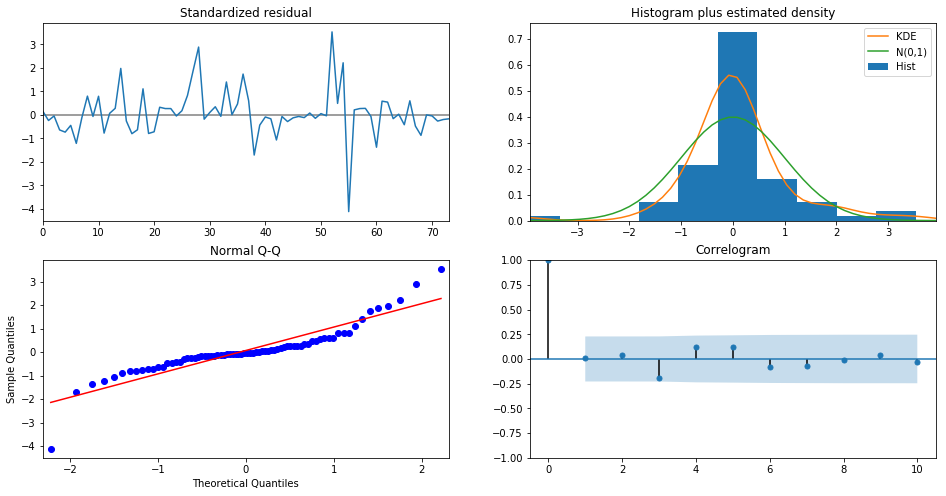

In [13]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [14]:
# setting initial values and some bounds for them
#ps = qs = range(2, 5)
ps = qs = Ps = Qs = range(0, 2)
d = 1
D = 1
s = 24 # season length is 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

16

In [15]:
'''
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return df with parameters and corresponding AIC
        
        parameters_list - (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in parameters_list:
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(train, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table
    
result_table = optimizeSARIMA(parameters_list, d, D, s)
print(result_table)'''

'\ndef optimizeSARIMA(parameters_list, d, D, s):\n    """\n        Return df with parameters and corresponding AIC\n        \n        parameters_list - (p, q, P, Q) tuples\n        d - integration order in ARIMA model\n        D - seasonal integration order \n        s - length of season\n    """\n    \n    results = []\n    best_aic = float("inf")\n\n    for param in parameters_list:\n        # we need try-except because on some combinations model fails to converge\n        try:\n            model=sm.tsa.statespace.SARIMAX(train, order=(param[0], d, param[1]), \n                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)\n        except:\n            continue\n        aic = model.aic\n        # saving best model, AIC and parameters\n        if aic < best_aic:\n            best_model = model\n            best_aic = aic\n            best_param = param\n        results.append([param, model.aic])\n\n    result_table = pd.DataFrame(results)\n    resu

In [16]:
best_model = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()

print(best_model.summary())

/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                     total_activity   No. Observations:                  125
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 24)   Log Likelihood                -129.397
Date:                            Sun, 05 May 2019   AIC                            266.794
Time:                                    17:14:00   BIC                            276.010
Sample:                                         0   HQIC                           270.470
                                            - 125                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8084      0.131      6.156      0.000       0.551       1.066
ma.L1         -1.0000    395.500   

In [17]:
def plotSARIMA(series, model, n):

    data = series.copy()
    #print(data.head())

    #data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    
    forecast = pd.DataFrame(model.predict(start=data.shape[0], end=data.shape[0]+n))
    #forecast.to_csv('forecast1.csv', index='activity_hour', encoding='utf-8',header=False)
    forecast.to_csv('forecast1.csv', encoding='utf-8',header=False)
    #colnames = ['activity_hour', 'total_activity']
    #forecast = pd.read_csv('forecast1.csv', names=colnames, header=None)
    
    #forecast = forecast.set_index('activity_hour')
    
    train.to_csv('train.csv', index='activity_hour', encoding='utf-8')
    test.to_csv('test.csv', index='activity_hour', encoding='utf-8')
    #print(forecast.head(3))
    #print(test.head())
    #print(train.head())
    
    #ax = train.plot(x='activity_hour', y='total_activity', label='train')
    #test.plot(ax=ax, x='activity_hour', y='total_activity', label='test')
    #forecast.plot(ax=ax, x='activity_hour', y='total_activity', label='model')
    #plt.figure(figsize=(50, 30))
    #plt.show()
    
    
            
plotSARIMA(train, best_model, 41)

/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
